In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
df_sst_lr = pd.read_csv("alg2/CSV_SST_LR_alg4.csv")
df_sst_bert = pd.read_csv("alg2/CSV_SST_bertlin_alg4.csv")
df_essay_lr = pd.read_csv("alg2/CSV_essay_LR_alg4.csv")
df_essay_bert = pd.read_csv("alg2/CSV_essay_bertlin_alg4.csv")

/var/folders/9_/y3v35tk14nl7_b9ks8h4l79c0000gn/T/ipykernel_6233/4047652567.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

/var/folders/9_/y3v35tk14nl7_b9ks8h4l79c0000gn/T/ipykernel_6233/4047652567.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

In [3]:
dfs = [df_sst_lr, df_sst_bert, df_essay_lr, df_essay_bert]
# calculate abs diff from 0.5
for i, df in enumerate(dfs):
    print(i)
    df['dist_from_thresh'] = abs(0.5 - df['old_prediction'])
    

titles = ["LR", "BERT", "LR", "BERT"]
dfs_with_k = []
for i, df in enumerate(dfs):
    cur_df_with_k = dfs[i][(dfs[i]['k'].notnull()) & (dfs[i]['k']!="None")]
    cur_df_with_k['k'] = pd.to_numeric(cur_df_with_k['k'])
    dfs_with_k.append(cur_df_with_k)
    

0
1
2
3


/var/folders/9_/y3v35tk14nl7_b9ks8h4l79c0000gn/T/ipykernel_6233/1047526314.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df_with_k['k'] = pd.to_numeric(cur_df_with_k['k'])


In [4]:
sns.set_theme(style="white")

In [5]:
biggest_upper = 4000
bins = []
upper = 0
bin_size = 100
while upper < biggest_upper:
    bins.append(upper)
    upper += bin_size
print(bins)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]


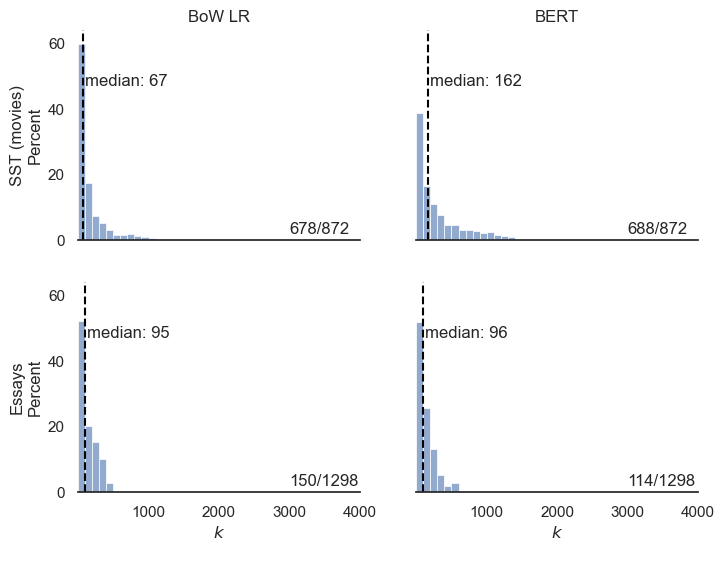

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6))

df_idx = 0
for i in range(2):
    for j in range(2):
        median_k = np.median(dfs_with_k[df_idx]['k'].values)
        #for idx_target, label_target  in list(D_targets.items()):
        ax_sp = sns.histplot(data=dfs_with_k[df_idx], x="k", stat="percent",  
                     alpha=0.6, bins=bins, ax=ax[i][j]) #, aspect=1.5,
        ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")
        #ax_sp.set_title(titles[df_idx])
        if df_idx == 0:
            ax_sp.set_title("BoW LR")
            #ax_sp.set_title("SST (movies)")
        elif df_idx == 1:
            ax_sp.set_title("BERT")
            #ax_sp.set_title("Essays")
            
        
        if df_idx == 2:
            ax_sp.set_xlabel("$k$\n")
        elif df_idx == 3:
            ax_sp.set_xlabel("$k$\n")
        
        if df_idx == 0:
            ax_sp.set_ylabel("SST (movies)\nPercent")
        elif df_idx == 2:
            ax_sp.set_ylabel("Essays\nPercent")
            
        ax_sp.spines.left.set_visible(False)
        ax_sp.spines.top.set_visible(False)
        ax_sp.spines.right.set_visible(False)
        ax_sp.set_xlim((1,4001))
        ax_sp.set_ylim((0,64))
        ax_sp.text(median_k+30, 47, "median: {}".format(int(median_k)))
        ax_sp.text(3000, 2, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
        df_idx += 1

        
        

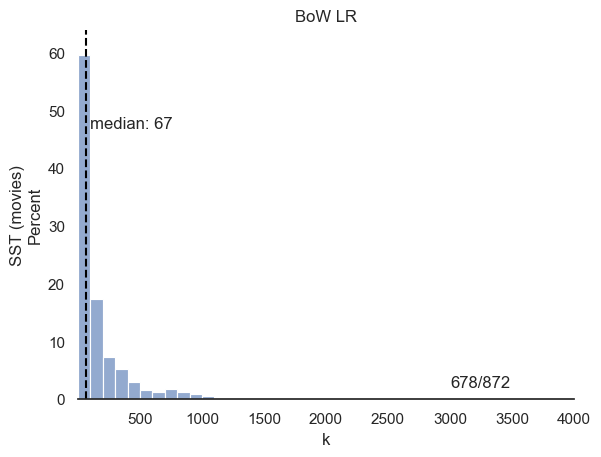

In [7]:
df_idx = 0
median_k = np.median(dfs_with_k[df_idx]['k'].values)
#for idx_target, label_target  in list(D_targets.items()):
ax_sp = sns.histplot(data=dfs_with_k[df_idx], x="k", stat="percent",  
             alpha=0.6, bins=bins) #, aspect=1.5,
ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")
#ax_sp.set_title(titles[df_idx])
if df_idx == 0:
    ax_sp.set_title("BoW LR")
    #ax_sp.set_title("SST (movies)")
elif df_idx == 1:
    ax_sp.set_title("BERT")
    #ax_sp.set_title("Essays")


if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")

if df_idx == 0:
    ax_sp.set_ylabel("SST (movies)\nPercent")
elif df_idx == 2:
    ax_sp.set_ylabel("Essays\nPercent")

ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((1,4001))
ax_sp.set_ylim((0,64))
ax_sp.text(median_k+30, 47, "median: {}".format(int(median_k)))
ax_sp.text(3000, 2, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
fig = ax_sp.figure
fig.savefig("alg2_plot_dist/SST_LR.jpg")

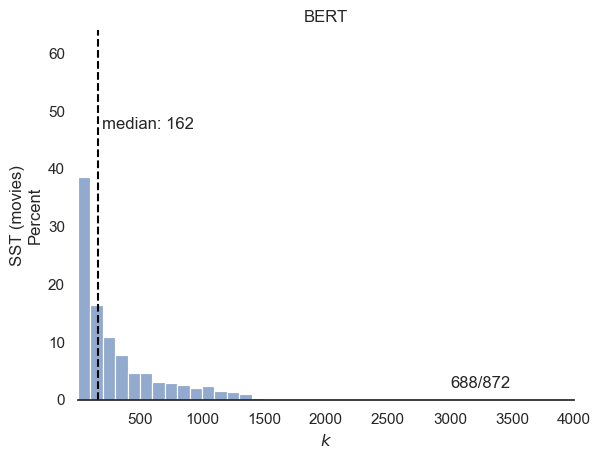

In [8]:
df_idx = 1
median_k = np.median(dfs_with_k[df_idx]['k'].values)
#for idx_target, label_target  in list(D_targets.items()):
ax_sp = sns.histplot(data=dfs_with_k[df_idx], x="k", stat="percent",  
             alpha=0.6, bins=bins) #, aspect=1.5,
ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")
#ax_sp.set_title(titles[df_idx])


ax_sp.set_title("BERT")
#ax_sp.set_title("Essays")


if df_idx == 2 or 0:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3 or 1:
    ax_sp.set_xlabel("$k$\n")

if df_idx == 0 or 1:
    ax_sp.set_ylabel("SST (movies)\nPercent")
elif df_idx == 2 or 3:
    ax_sp.set_ylabel("Essays\nPercent")

ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((1,4001))
ax_sp.set_ylim((0,64))
ax_sp.text(median_k+30, 47, "median: {}".format(int(median_k)))
ax_sp.text(3000, 2, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
fig = ax_sp.figure
fig.savefig("alg2_plot_dist/SST_Bert.jpg")

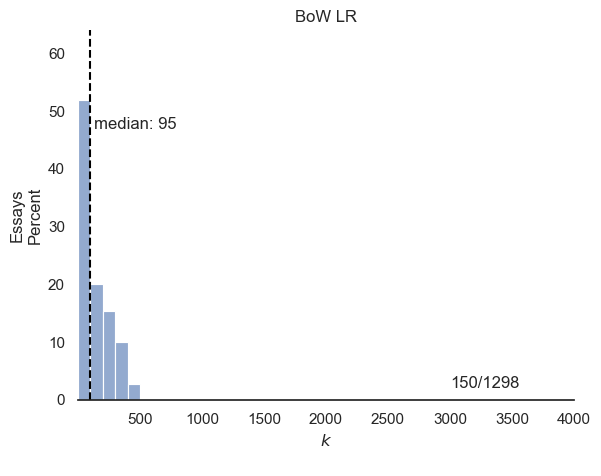

In [9]:
df_idx = 2
median_k = np.median(dfs_with_k[df_idx]['k'].values)
#for idx_target, label_target  in list(D_targets.items()):
ax_sp = sns.histplot(data=dfs_with_k[df_idx], x="k", stat="percent",  
             alpha=0.6, bins=bins) #, aspect=1.5,
ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")
#ax_sp.set_title(titles[df_idx])
if df_idx == 0 or 2:
    ax_sp.set_title("BoW LR")
    #ax_sp.set_title("SST (movies)")
elif df_idx == 1 or 3:
    ax_sp.set_title("BERT")
    #ax_sp.set_title("Essays")


if df_idx == 2 or 0:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3 or 1:
    ax_sp.set_xlabel("$k$\n")


ax_sp.set_ylabel("Essays\nPercent")

ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((1,4001))
ax_sp.set_ylim((0,64))
ax_sp.text(median_k+30, 47, "median: {}".format(int(median_k)))
ax_sp.text(3000, 2, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
fig = ax_sp.figure
fig.savefig("alg2_plot_dist/essay_LR.jpg")

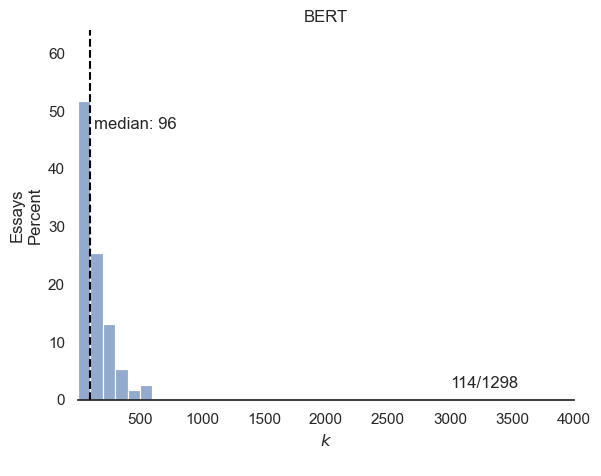

In [10]:
df_idx = 3
median_k = np.median(dfs_with_k[df_idx]['k'].values)
#for idx_target, label_target  in list(D_targets.items()):
ax_sp = sns.histplot(data=dfs_with_k[df_idx], x="k", stat="percent",  
             alpha=0.6, bins=bins) #, aspect=1.5,
ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")
#ax_sp.set_title(titles[df_idx])
if df_idx == 0:
    ax_sp.set_title("BoW LR")
    #ax_sp.set_title("SST (movies)")
elif df_idx == 1 or 3:
    ax_sp.set_title("BERT")
    #ax_sp.set_title("Essays")


if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")


ax_sp.set_ylabel("Essays\nPercent")

ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((1,4001))
ax_sp.set_ylim((0,64))
ax_sp.text(median_k+30, 47, "median: {}".format(int(median_k)))
ax_sp.text(3000, 2, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
fig = ax_sp.figure
fig.savefig("alg2_plot_dist/essay_Bert.jpg")

In [11]:
dfs_with_k[0].head()

,test_movie_id,test_movie_review_text,old_prediction,right_prediction,k,successful_flip,train_example_1,train_example_2,train_example_3,train_example_4,...,train_example_6912,train_example_6913,train_example_6914,train_example_6915,train_example_6916,train_example_6917,train_example_6918,train_example_6919,train_example_6920,dist_from_thresh
0,661,label: 0 doc: it s slow very very slow,0.525447,False,1,True,id: 6005 label: 1 doc: it s not too fast and...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025447
1,630,label: 0 doc: it has all the excitement of ea...,0.492439,True,1,True,id: 2682 label: 1 doc: he drags it back sing...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007561
2,636,label: 0 doc: do n t be fooled by the impress...,0.502665,False,1,True,id: 5361 label: 1 doc: bravado kathy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002665
3,240,label: 1 doc: the film may appear naked in it...,0.504910,True,1,True,id: 6828 label: 0 doc: a high minded snoozer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004910
4,782,label: 1 doc: a fitfully amusing romp that if...,0.486416,False,1,True,id: 8 label: 1 doc: extreme ops exceeds expe...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013584


In [12]:
df_sst_lr.head()

,test_movie_id,test_movie_review_text,old_prediction,right_prediction,k,successful_flip,train_example_1,train_example_2,train_example_3,train_example_4,...,train_example_6912,train_example_6913,train_example_6914,train_example_6915,train_example_6916,train_example_6917,train_example_6918,train_example_6919,train_example_6920,dist_from_thresh
0,661,label: 0 doc: it s slow very very slow,0.525447,False,1,True,id: 6005 label: 1 doc: it s not too fast and...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025447
1,630,label: 0 doc: it has all the excitement of ea...,0.492439,True,1,True,id: 2682 label: 1 doc: he drags it back sing...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007561
2,636,label: 0 doc: do n t be fooled by the impress...,0.502665,False,1,True,id: 5361 label: 1 doc: bravado kathy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002665
3,240,label: 1 doc: the film may appear naked in it...,0.504910,True,1,True,id: 6828 label: 0 doc: a high minded snoozer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004910
4,782,label: 1 doc: a fitfully amusing romp that if...,0.486416,False,1,True,id: 8 label: 1 doc: extreme ops exceeds expe...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013584


In [13]:
df_sst_bert_k = df_sst_bert[(df_sst_bert['k'].notnull()) & (df_sst_bert['k']!="None")]
df_sst_bert_k['k'] = pd.to_numeric(df_sst_bert_k['k'])
df_sst_bert_k['dist_from_thresh'] = abs(0.5 - df_sst_bert_k['old_prediction'])
df_sst_bert_k.head()

/var/folders/9_/y3v35tk14nl7_b9ks8h4l79c0000gn/T/ipykernel_6233/3362356090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sst_bert_k['k'] = pd.to_numeric(df_sst_bert_k['k'])
/var/folders/9_/y3v35tk14nl7_b9ks8h4l79c0000gn/T/ipykernel_6233/3362356090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sst_bert_k['dist_from_thresh'] = abs(0.5 - df_sst_bert_k['old_prediction'])


,test_movie_id,test_movie_review_text,old_prediction,right_prediction,k,successful_flip,train_example_1,train_example_2,train_example_3,train_example_4,...,train_example_6912,train_example_6913,train_example_6914,train_example_6915,train_example_6916,train_example_6917,train_example_6918,train_example_6919,train_example_6920,dist_from_thresh
0,556,label: 0 doc: oh come on,0.497900,True,1,True,id: 3827 label: 0 doc: hokey art house prete...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002100
1,612,label: 0 doc: it s one pussy ass world when e...,0.504324,False,1,True,id: 2531 label: 1 doc: there s absolutely no...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004324
2,163,label: 1 doc: maud and roland s search for an...,0.496211,False,1,False,id: 6373 label: 0 doc: behan s memoir is gre...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003789
3,520,label: 0 doc: impostor has a handful of thril...,0.496546,True,1,True,id: 6282 label: 0 doc: but the movie that do...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003454
4,386,label: 1 doc: another one of those estrogen o...,0.496048,False,1,True,id: 5445 label: 0 doc: nicks and steinberg m...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003952


<AxesSubplot:xlabel='k', ylabel='dist_from_thresh'>

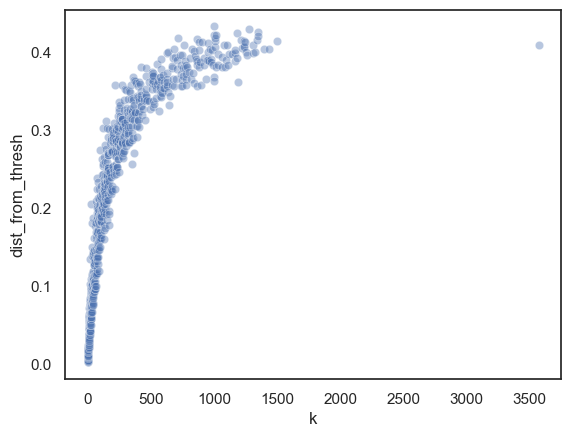

In [14]:
sns.scatterplot(data=df_sst_bert_k, x="k", y="dist_from_thresh", alpha=0.4) #['dist_from_thresh'] .hist()

In [15]:
df_sst_bert_k["k"].corr(df_sst_bert_k["dist_from_thresh"])

0.7859788559739503

In [16]:
df_sst_lr.head()

,test_movie_id,test_movie_review_text,old_prediction,right_prediction,k,successful_flip,train_example_1,train_example_2,train_example_3,train_example_4,...,train_example_6912,train_example_6913,train_example_6914,train_example_6915,train_example_6916,train_example_6917,train_example_6918,train_example_6919,train_example_6920,dist_from_thresh
0,661,label: 0 doc: it s slow very very slow,0.525447,False,1,True,id: 6005 label: 1 doc: it s not too fast and...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025447
1,630,label: 0 doc: it has all the excitement of ea...,0.492439,True,1,True,id: 2682 label: 1 doc: he drags it back sing...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007561
2,636,label: 0 doc: do n t be fooled by the impress...,0.502665,False,1,True,id: 5361 label: 1 doc: bravado kathy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002665
3,240,label: 1 doc: the film may appear naked in it...,0.504910,True,1,True,id: 6828 label: 0 doc: a high minded snoozer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004910
4,782,label: 1 doc: a fitfully amusing romp that if...,0.486416,False,1,True,id: 8 label: 1 doc: extreme ops exceeds expe...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013584


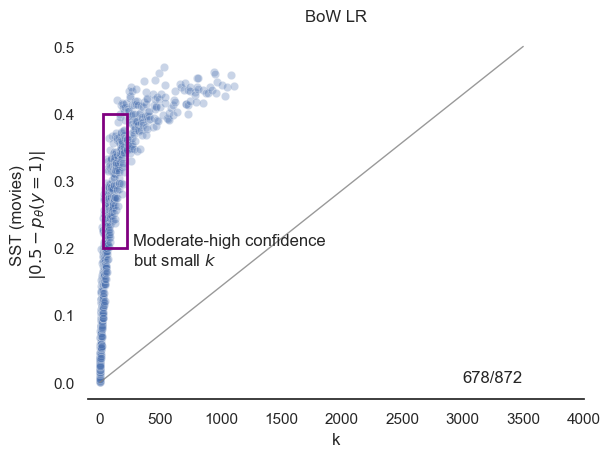

In [17]:
df_idx = 0
ax_sp = sns.scatterplot(data=dfs_with_k[df_idx], x="k", y="dist_from_thresh", alpha=0.3)
#ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")

ax_sp.plot([0, 3500], [0, 0.5], 'gray', linewidth=1, alpha=0.8)
if df_idx == 0:
    ax_sp.set_title("BoW LR")


    left, bottom, width, height = (25, 0.2, 200, 0.2)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                fill=False,
                color="purple",
                linewidth=2)

    ax_sp.add_patch(rect)

    ax_sp.text(left+250, 0.175, "Moderate-high confidence\nbut small $k$")


elif df_idx == 1:
    ax_sp.set_title("BERT")

if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")

if df_idx == 0:
    ax_sp.set_ylabel("SST (movies)\n" + r"$|0.5 - p_\theta(y=1)|$")
elif df_idx == 2:
    ax_sp.set_ylabel("Essays\n" + r"$|0.5 - p_\theta(y=1)|$")



ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((-100,4001))


ax_sp.text(3000, 0, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
df_idx += 1
fig = ax_sp.figure 
fig.savefig("alg2_plot_kp/SST_LR_alg2_kp.jpg")

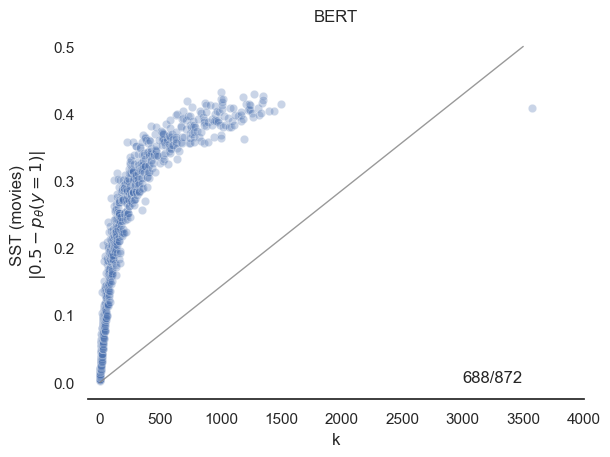

In [18]:
df_idx = 1
ax_sp = sns.scatterplot(data=dfs_with_k[df_idx], x="k", y="dist_from_thresh", alpha=0.3)
#ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")

ax_sp.plot([0, 3500], [0, 0.5], 'gray', linewidth=1, alpha=0.8)
if df_idx == 0:
    ax_sp.set_title("BoW LR")


    left, bottom, width, height = (25, 0.2, 200, 0.2)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                fill=False,
                color="purple",
                linewidth=2)

    ax_sp.add_patch(rect)

    ax_sp.text(left+250, 0.175, "Moderate-high confidence\nbut small $k$")


elif df_idx == 1:
    ax_sp.set_title("BERT")

if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")

if df_idx == 0 or 1:
    ax_sp.set_ylabel("SST (movies)\n" + r"$|0.5 - p_\theta(y=1)|$")
elif df_idx == 2:
    ax_sp.set_ylabel("Essays\n" + r"$|0.5 - p_\theta(y=1)|$")



ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((-100,4001))


ax_sp.text(3000, 0, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
df_idx += 1
fig = ax_sp.figure 
fig.savefig("alg2_plot_kp/SST_BERT_alg2_kp.jpg")

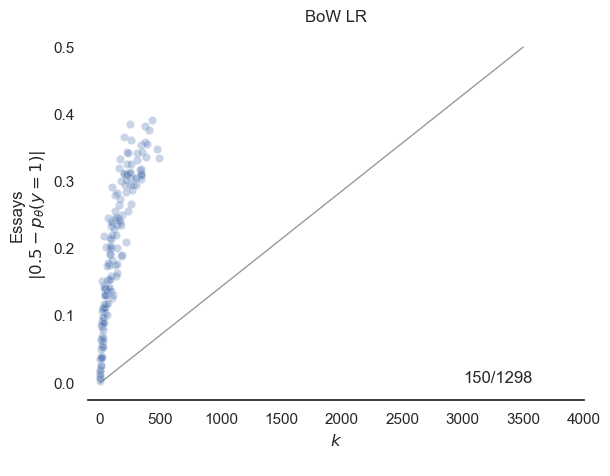

In [19]:
df_idx = 2
ax_sp = sns.scatterplot(data=dfs_with_k[df_idx], x="k", y="dist_from_thresh", alpha=0.3)
#ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")

ax_sp.plot([0, 3500], [0, 0.5], 'gray', linewidth=1, alpha=0.8)
if df_idx == 0:
    ax_sp.set_title("BoW LR")


    left, bottom, width, height = (25, 0.2, 200, 0.2)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                fill=False,
                color="purple",
                linewidth=2)

    ax_sp.add_patch(rect)

    ax_sp.text(left+250, 0.175, "Moderate-high confidence\nbut small $k$")



ax_sp.set_title("BoW LR")

if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")

if df_idx == 0:
    ax_sp.set_ylabel("SST (movies)\n" + r"$|0.5 - p_\theta(y=1)|$")
elif df_idx == 2:
    ax_sp.set_ylabel("Essays\n" + r"$|0.5 - p_\theta(y=1)|$")



ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((-100,4001))


ax_sp.text(3000, 0, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
df_idx += 1
fig = ax_sp.figure 
fig.savefig("alg2_plot_kp/essay_LR_alg2_kp.jpg")

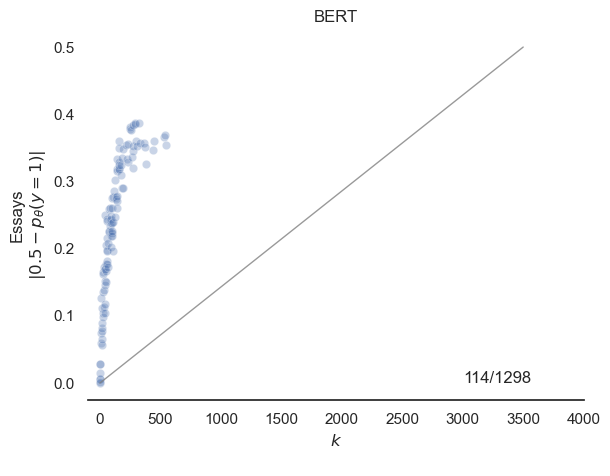

In [20]:
df_idx = 3
ax_sp = sns.scatterplot(data=dfs_with_k[df_idx], x="k", y="dist_from_thresh", alpha=0.3)
#ax_sp.axvline(median_k, color="black", ls="--", label="Median $k$")

ax_sp.plot([0, 3500], [0, 0.5], 'gray', linewidth=1, alpha=0.8)
if df_idx == 0:
    ax_sp.set_title("BoW LR")


    left, bottom, width, height = (25, 0.2, 200, 0.2)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                fill=False,
                color="purple",
                linewidth=2)

    ax_sp.add_patch(rect)

    ax_sp.text(left+250, 0.175, "Moderate-high confidence\nbut small $k$")



ax_sp.set_title("BERT")

if df_idx == 2:
    ax_sp.set_xlabel("$k$\n")
elif df_idx == 3:
    ax_sp.set_xlabel("$k$\n")


ax_sp.set_ylabel("Essays\n" + r"$|0.5 - p_\theta(y=1)|$")



ax_sp.spines.left.set_visible(False)
ax_sp.spines.top.set_visible(False)
ax_sp.spines.right.set_visible(False)
ax_sp.set_xlim((-100,4001))


ax_sp.text(3000, 0, "{}/{}".format(dfs_with_k[df_idx]['k'].shape[0], dfs[df_idx].shape[0]))
df_idx += 1
fig = ax_sp.figure 
fig.savefig("alg2_plot_kp/essay_BERT_alg2_kp.jpg")